In [1]:
'''pip install plotly
pip install numpy
pip install pandas
pip install matplotlib
pip install ipywidgets'''

'pip install plotly\npip install numpy\npip install pandas\npip install matplotlib\npip install ipywidgets'

In [2]:
%matplotlib inline
import pandas as pd
from io import BytesIO
from zipfile import ZipFile
from urllib.request import urlopen
import ipywidgets 
import traitlets
import bqplot
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly

In [3]:
resp = urlopen('https://s3-us-gov-west-1.amazonaws.com/cg-d4b776d0-d898-4153-90c8-8336f86bdfec/hate_crime.zip')
zipfile = ZipFile(BytesIO(resp.read()))
zipfile.namelist()[0]
df = pd.read_csv(zipfile.open('hate_crime.csv'))

/opt/conda/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (19) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


Let's look at what kind of data the dataset contains:

In [4]:
df.head()

,INCIDENT_ID,DATA_YEAR,ORI,PUB_AGENCY_NAME,PUB_AGENCY_UNIT,AGENCY_TYPE_NAME,STATE_ABBR,STATE_NAME,DIVISION_NAME,REGION_NAME,...,OFFENDER_RACE,OFFENDER_ETHNICITY,VICTIM_COUNT,OFFENSE_NAME,TOTAL_INDIVIDUAL_VICTIMS,LOCATION_NAME,BIAS_DESC,VICTIM_TYPES,MULTIPLE_OFFENSE,MULTIPLE_BIAS
0,3015,1991,AR0040200,Rogers,NaN,City,AR,Arkansas,West South Central,South,...,White,NaN,1,Intimidation,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-Black or African American,Individual,S,S
1,3016,1991,AR0290100,Hope,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Simple Assault,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,S,S
2,43,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Residence/Home,Anti-Black or African American,Individual,S,S
3,44,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,2,Aggravated Assault;Destruction/Damage/Vandalis...,1.0,Highway/Road/Alley/Street/Sidewalk,Anti-White,Individual,M,S
4,3017,1991,AR0350100,Pine Bluff,NaN,City,AR,Arkansas,West South Central,South,...,Black or African American,NaN,1,Aggravated Assault,1.0,Service/Gas Station,Anti-White,Individual,S,S


### Heat map and Pair plot

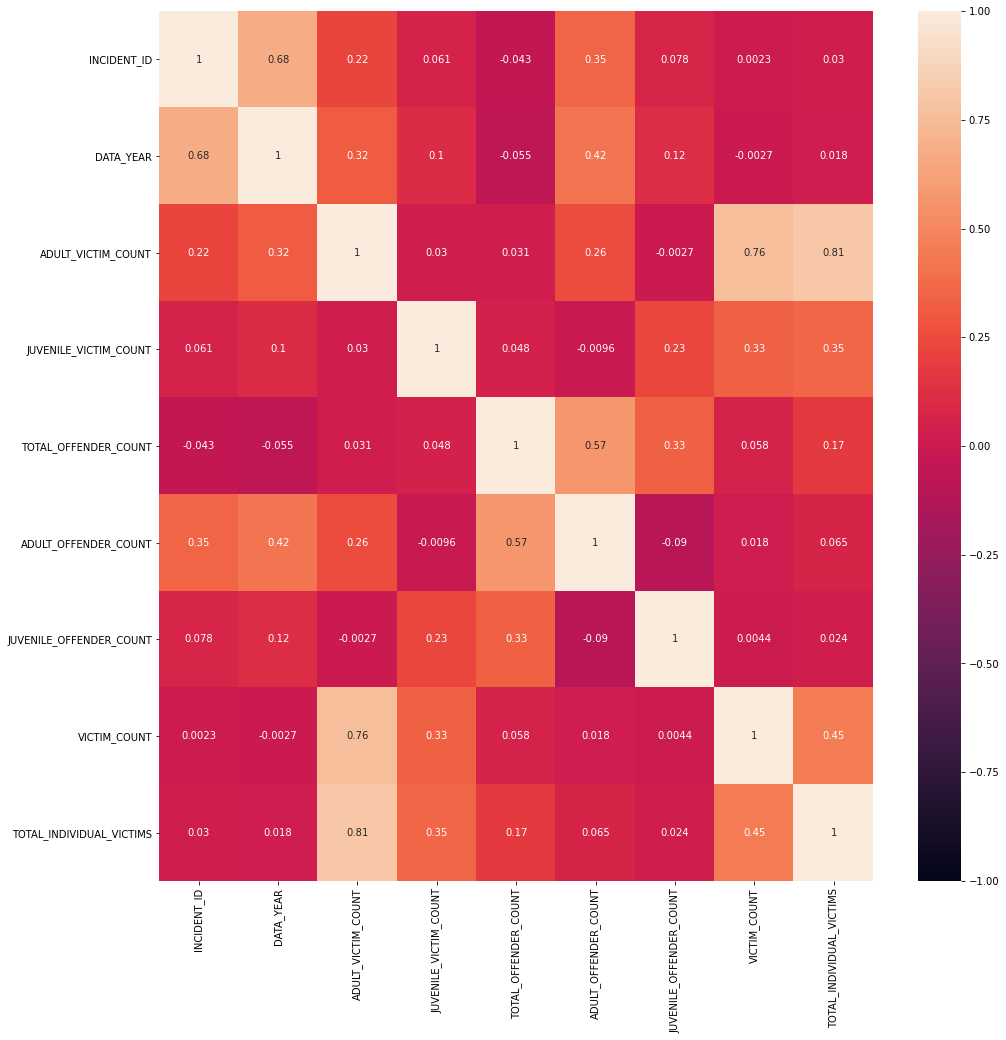

In [5]:
#heat map showing correlation
plt.figure(figsize=(16, 16))
heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)

Heat map that shows the correlation between variables. For example, victim count and adult victim count has a positive correlatioon oof 0.76. This means that as the number of victim count increases, the number of adult victims will increase as well. The number of adult victims given victim count will increase more that the number of juvenile victims given victim count becasue victim count and juvenile victims only have a correlation of 0.33; still a positive correlation, but not as intense as adult victims.

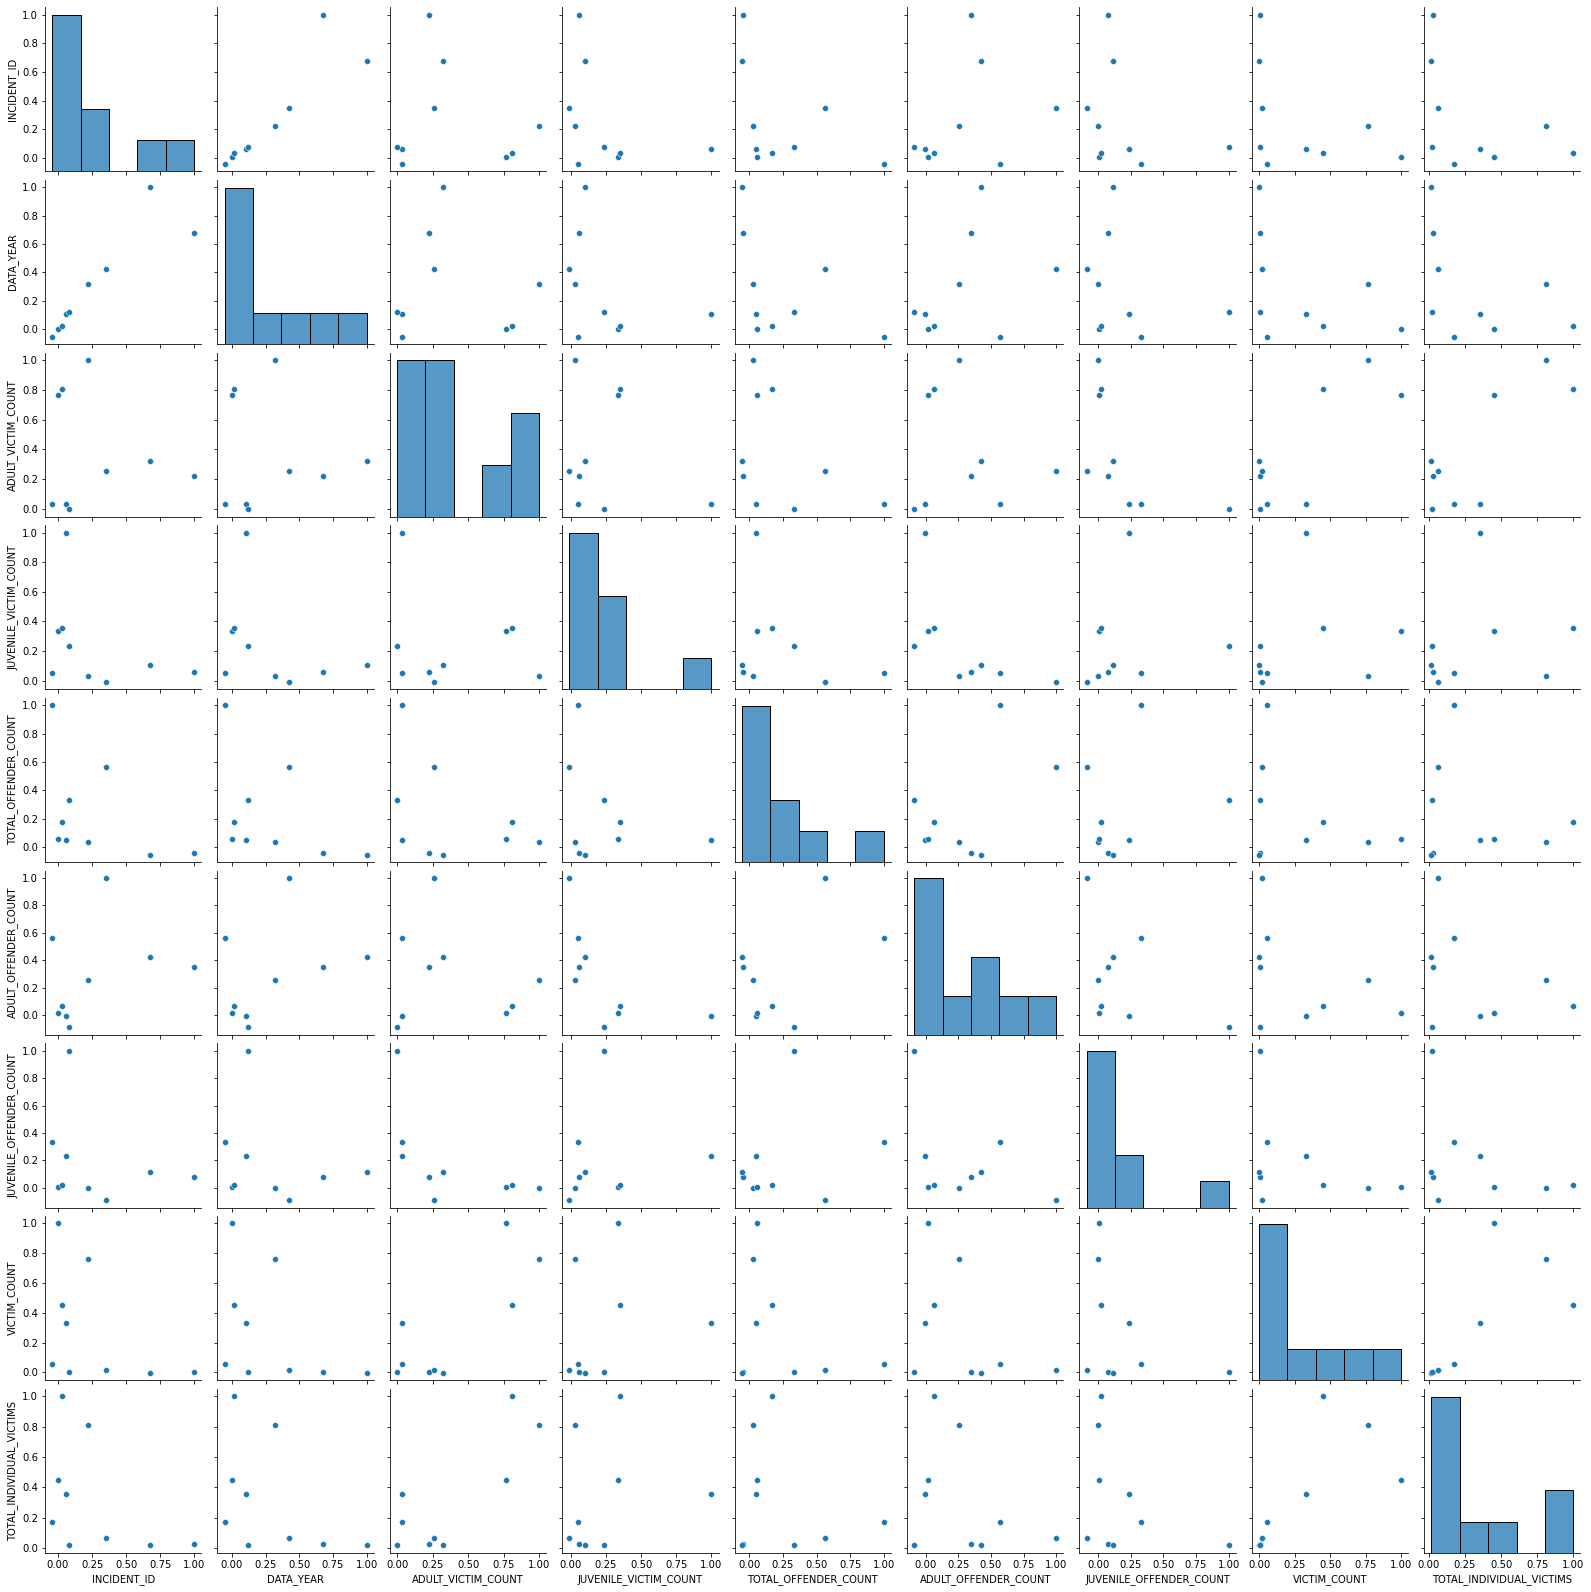

In [6]:
#Pair plot
sns.pairplot(df.corr())

Pair plot that shows the correlation between variables. Basically a visual of the heat map (instead of numbers). Viewers can easily see where there might be correlation.

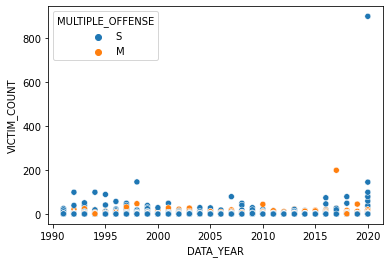

In [7]:
#Victim count and whether or not the offender commited an offence before over time
sns.scatterplot(data=df, x="DATA_YEAR", y="VICTIM_COUNT", hue="MULTIPLE_OFFENSE", legend=True, sizes=(20, 10));

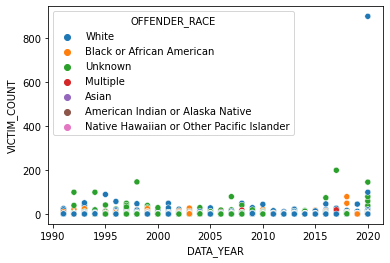

In [8]:
#Victim count and offender race over time
sns.scatterplot(data=df, x="DATA_YEAR", y="VICTIM_COUNT", hue="OFFENDER_RACE", legend=True);

For part 3, planning on making this interactive with a drop box menu. 

In [9]:
# Date range
year0 = min(df['DATA_YEAR']) #1991
yearN = max(df['DATA_YEAR']) #2020
years = list(range(year0, yearN + 1))
print('Date range: {} to {}'.format(year0, yearN))
year2idx = dict(zip(years, range(len(years))))

Date range: 1991 to 2020


### Compare number of incidents of two states in one specific year 

In [10]:
@ipywidgets.interact
def show_incident_by_state_yearly(x=['AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'GA', 'IA', 'ID', 'IL',
       'KS', 'MA', 'MD', 'MN', 'MO', 'MS', 'NJ', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'TN', 'TX', 'VA', 'WA', 'WI', 'AL', 'FL', 'IN', 'KY',
       'LA', 'ME', 'MI', 'NC', 'ND', 'RI', 'SC', 'UT', 'WY', 'AK', 'MT',
       'NM', 'SD', 'VT', 'NH', 'NB', 'WV', 'GM', 'FS', 'HI'], 
                            y=['AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'GA', 'IA', 'ID', 'IL',
       'KS', 'MA', 'MD', 'MN', 'MO', 'MS', 'NJ', 'NV', 'NY', 'OH', 'OK',
       'OR', 'PA', 'TN', 'TX', 'VA', 'WA', 'WI', 'AL', 'FL', 'IN', 'KY',
       'LA', 'ME', 'MI', 'NC', 'ND', 'RI', 'SC', 'UT', 'WY', 'AK', 'MT',
       'NM', 'SD', 'VT', 'NH', 'NB', 'WV', 'GM', 'FS', 'HI'],
                            z=(1991, 2020, 1)):
    df_x = df[df["STATE_ABBR"] == x]
    incidences_per_year_x = df_x[df_x["DATA_YEAR"] < z].groupby('DATA_YEAR')['INCIDENT_ID'].count()
    df_y = df[df["STATE_ABBR"] == y]
    incidences_per_year_y = df_y[df_y["DATA_YEAR"] < z].groupby('DATA_YEAR')['INCIDENT_ID'].count()
    plt.xlim((1990, 2025))
    incidences_per_year_x.plot()
    incidences_per_year_y.plot()
    plt.xlabel('Year')
    plt.ylabel('Comparison of Incidents by state')

interactive(children=(Dropdown(description='x', options=('AR', 'AZ', 'CA', 'CO', 'CT', 'DC', 'DE', 'GA', 'IA',…

### Hate Bias analysis

#### Categorize bias into three categories

In [11]:
crimes_by_group = df.groupby('BIAS_DESC')['INCIDENT_ID'].count()
crimes_by_group.sort_values(ascending=False)

BIAS_DESC
Anti-Black or African American                                                                          74762
Anti-Jewish                                                                                             28013
Anti-White                                                                                              25193
Anti-Gay (Male)                                                                                         21854
Anti-Hispanic or Latino                                                                                 14030
                                                                                                        ...  
Anti-Gay (Male);Anti-Hispanic or Latino;Anti-Male                                                           1
Anti-Gay (Male);Anti-Heterosexual                                                                           1
Anti-Gay (Male);Anti-Gender Non-Conforming;Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)        1


In [12]:
races = crimes_by_group.loc[['Anti-Black or African American', 'Anti-Jewish', 'Anti-White', 'Anti-Hispanic or Latino',
                             'Anti-Other Race/Ethnicity/Ancestry','Anti-Asian', 'Anti-Multiple Races, Group', 
                             'Anti-American Indian or Alaska Native', 'Anti-Arab']]
sexiuality = crimes_by_group.loc[['Anti-Gay (Male)', 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)', 
                                  'Anti-Lesbian (Female)','Anti-Transgender', 'Anti-Bisexual'
                                 ]]
religion = crimes_by_group.loc[['Anti-Islamic (Muslim)', 'Anti-Other Religion', 'Anti-Catholic', 'Anti-Protestant', 
                                'Anti-Multiple Religions, Group']]

#### Show distribution of crimes in the three categories seperately by year

In [13]:
@ipywidgets.interact
def show_incident_by_state_yearly(z=(1991, 2020, 1)):
    fig, axes = plt.subplots(nrows=3, ncols=1)
    crimes_by_year = df[df["DATA_YEAR"] == z]
    
    # selecting rows based on racial bias    
    crimes_by_year_by_races = crimes_by_year[(crimes_by_year['BIAS_DESC'] == 'Anti-Black or African American') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-Jewish') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-White') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-Hispanic or Latino') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-Other Race/Ethnicity/Ancestry') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-Asian') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-Multiple Races, Group') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-American Indian or Alaska Native') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-Arab') ].groupby('BIAS_DESC')['INCIDENT_ID'].count()
    crimes_by_year_by_races.plot.barh(ax=axes[0])
    # selecting rows based on racial bias
#     races = ['Anti-Black or African American', 'Anti-Jewish', 'Anti-White', 'Anti-Hispanic or Latino',
#                              'Anti-Other Race/Ethnicity/Ancestry','Anti-Asian', 'Anti-Multiple Races, Group', 
#                              'Anti-American Indian or Alaska Native', 'Anti-Arab']
#     crimes_by_year_racial = crimes_by_year.loc[crimes_by_year['BIAS_DESC'].isin(races)]
#     crimes_by_year_racial.plot.barh(ax=axes[0])
    #crimes_by_year_by_races
    
    # selecting rows based on sexiuality bias 
    crimes_by_year_by_sexiuality = crimes_by_year[(crimes_by_year['BIAS_DESC'] == 'Anti-Gay (Male)') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-Lesbian, Gay, Bisexual, or Transgender (Mixed Group)') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-Lesbian (Female)') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-Transgender') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-Bisexual') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-Asian') ].groupby('BIAS_DESC')['INCIDENT_ID'].count()    
    crimes_by_year_by_sexiuality.plot.barh(figsize=(10,10), ax=axes[1])

    # selecting rows based on religion bias 
    crimes_by_year_by_religion = crimes_by_year[(crimes_by_year['BIAS_DESC'] == 'Anti-Islamic (Muslim)') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-Other Religion') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-Catholic') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-Protestant') |
                                             (crimes_by_year['BIAS_DESC'] == 'Anti-Multiple Religions, Group')].groupby('BIAS_DESC')['INCIDENT_ID'].count()    
    crimes_by_year_by_religion.plot.barh(ax=axes[2])    
    plt.xlabel('Year')


interactive(children=(IntSlider(value=2005, description='z', max=2020, min=1991), Output()), _dom_classes=('wi…

Limitaion: data value is not shown on this graph, the width of the three bars are different. Did not show the total number crimes of each category for 1991-2020. Also, three graphs is kind of redundant, I am thinking about how to merge them into one graph.

### Heat map (of the US)

Grouping all the Bias Description and counting the occurences of each:

(Only the top 50 Biases were included)

In [14]:
top=pd.Series(df.groupby('BIAS_DESC')['BIAS_DESC'].count()).nlargest(50)
top=top.to_frame()

Fixing the columns:

In [15]:
top['Bias']=top.index
top=top.reset_index(drop='True')
top.rename(columns={'BIAS_DESC':'Count'},inplace='True')

In [16]:
val=[1, 2, 4, 5, 6, 8, 9, 10, 11, 12, 13, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 44, 45, 46, 47, 48, 49, 50, 51, 53, 54, 55,56,60,66]

In [17]:
@ipywidgets.interact(Bias=top['Bias'])
def print_mpa(Bias):

    var=df.loc[df.BIAS_DESC==Bias].groupby('STATE_NAME')['STATE_NAME'].count()
    var.tolist()
    inc_count = dict(zip(val, var))
        
    proj = bqplot.AlbersUSA()

    color_sc = bqplot.ColorScale(scheme = "plasma")
    color_ax = bqplot.ColorAxis(scale = color_sc, label = 'Incident Count')
    
    label1 = ipywidgets.Label()
    label2 = ipywidgets.Label()
        
    def hover_over_state(mark, event):
        label1.value = "%s: " % (event['data']['name'])
        label2.value = "%s cases" % (event['data']['color']) if 'color' in event['data'] else "No Data"
        
    mark = bqplot.Map(
    map_data = bqplot.topo_load("map_data/USStatesMap.json"),
    color = inc_count,
    colors = {'default_color': 'none'},
    scales = {'projection': proj, 'color': color_sc}
    )
        
    mark.on_hover(hover_over_state)
    mark.hovered_styles={'hovered_fill':'green','hovered_stroke':'white','hovered_stroke_width':5.0}
    
    fig = bqplot.Figure(marks = [mark], axes =[color_ax],title='Bias Heatmap ({0})'.format(Bias))
    display(ipywidgets.VBox([(ipywidgets.HBox([label1, label2])), fig]))

interactive(children=(Dropdown(description='Bias', options=('Anti-Black or African American', 'Anti-Jewish', '…

This is a heat map of the US comparing the biases across multiple states. The Biases can be selected from a drop down menu.

In [18]:
Year=2019
vc=df.loc[df.DATA_YEAR==Year].groupby('STATE_NAME')['VICTIM_COUNT'].sum()
vc.tolist()
vic_count = dict(zip(val, vc))

proj = bqplot.AlbersUSA()

color_sc = bqplot.ColorScale(scheme = "plasma")
color_ax = bqplot.ColorAxis(scale = color_sc, label = 'Victim Count')

label1 = ipywidgets.Label()
label2 = ipywidgets.Label()

def hover_over_state(mark, event):
    label1.value = "%s: " % (event['data']['name'])
    label2.value = "%s victims" % (event['data']['color']) if 'color' in event['data'] else "No Data"

mark = bqplot.Map(
map_data = bqplot.topo_load("map_data/USStatesMap.json"),
color = vic_count,
colors = {'default_color': 'none'},
scales = {'projection': proj, 'color': color_sc}
)

mark.on_hover(hover_over_state)
mark.hovered_styles={'hovered_fill':'green','hovered_stroke':'white','hovered_stroke_width':5.0}

fig = bqplot.Figure(marks = [mark], axes =[color_ax],title='Victim Count Heatmap for the year {0}'.format(Year))
display(ipywidgets.VBox([(ipywidgets.HBox([label1, label2])), fig]))




This is a heat map of the US showing the victim count for 2019. This map will be made more interactive with the help of a slider the select the year from a range of 1991 to 2020.

### Vega-lite visualisations

The data visualization is taken from the hate crime dataset of the United states. I have made the data visualizations in vega lite as it is easy to make the graphs more interactive. a) The first graph shows a pie chart of different division names with the total number of crime records. It gives us more information while hovering over it b)The second part shows a line chart of different region names with the total number of crime records.

Shortcomings: a) After embedding it, it gets all the labels in a single frame. b) I also wanted to view a single part of the region name in the pie chart which I will try to complete in the third phase.

In [19]:
%%html
<iframe src="https://snehabaranwal.github.io/snehab2412.github.io/", width = 1500, height = 700></iframe>

# Intended Prototype Idea of Final Product

We came up with this visualization as it involves a lot of interactivity and it gives the user an ease to move through the data and gain meaningful insights into the dataset.
One of the challenges that we think we would encounter is changing the date and the time from the dataset as it is involves a lot of different markers (/,:,-) for representing time and date.
Also embedding the fade effect of the background data is something we are still working on and hope to achieve in the third phase of the project.

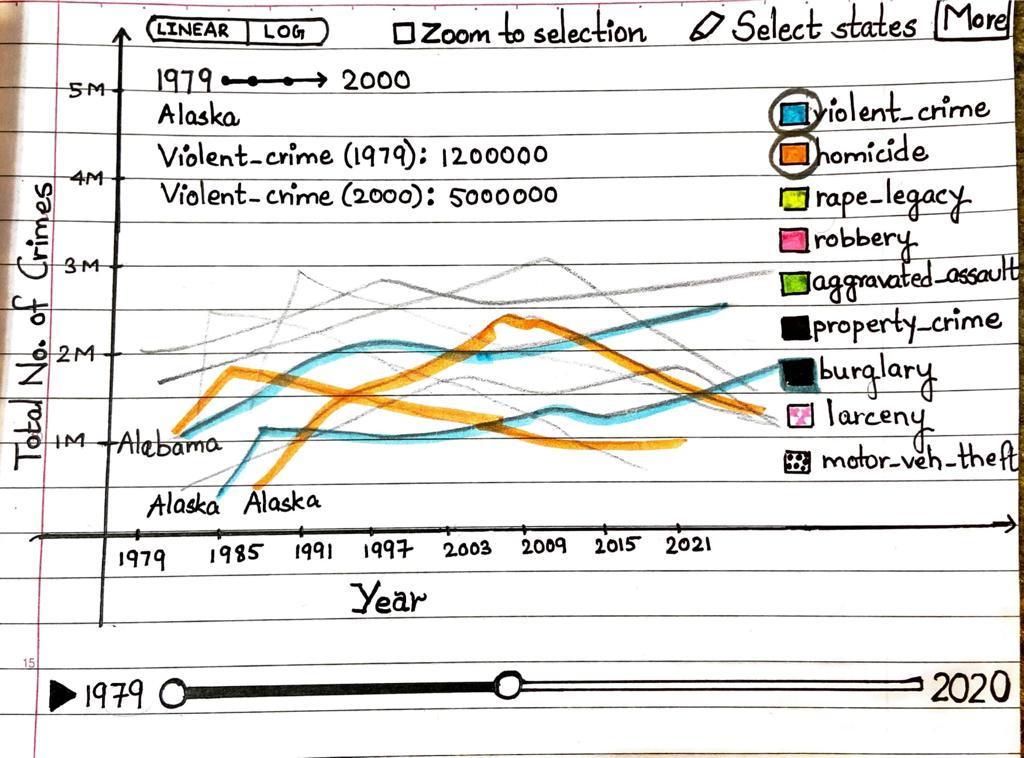